# COSADAMA Introduction to Data Science Study

- 작성자: 정 찬
- 참고자료: 2020년 코사다마 데이터 분석 커리큘럼(박하람), 2021년 코사다마 데이터 분석 커리큘럼(조용주), 파이썬 머신러닝 완벽 가이드(권철민), 비주얼 프로그래밍 수업(김승태), 파이썬으로 데이터 주무르기(민형기), 

Introduction to Data Science 커리큘럼의 목적은 데이터 '수집, '조작', '시각화'입니다. 1~2주에는 이미 만들어진 데이터를 조작하고, 효과적으로 시각화 하는 방법에 대해 배울 예정입니다.

이번 주에는 **데이터 분석 모듈 Pandas, 수치 데이터 처리 모듈 Numpy, 시각화 모듈 matplitlib**에 대해 배웁니다. 앞으로 가장 많이 사용하게 되실 모듈이니 꼼꼼히 공부하시고, 스스로 사용해보시며 친해지시길 바랍니다.

## 1. Pandas

모든 데이터, 정보가 줄글로 씌여 있다고 생각해 봅시다. 예컨대 
> 사과 100개, 귤 200개, 양초 50개가 있습니다.

이정도의 데이터는 한 눈으로 봐도 이해가 될 수 있습니다. 하지만 1960년대부터 2022년까지 매일, 모든 지역의, 모든 과일의 시세를 직관적으로 파악하기는 힘듭니다. 그래서 사람들은 대부분 **행row과 열column**으로 된 표table 형태의 2차원 데이터를 사용합니다. Excel이나 Numbers를 떠올리셨다면 정답입니다. **Pandas**는 이러한 2차원 데이터를 가공하고 처리하기 위해 만들어졌습니다. 

그렇다면 왜 Excel을 사용하지 않냐는 물음이 생길 수 있습니다. 우리가 다루는 데이터들은 하나하나 확인하기 어려울만큼 거대합니다. 컬럼이 한 화면에 들어오기 어려운 경우도 많고, 애초에 데이터가 많아서 Excel이 실행되지 않기도 합니다. 그래서 판다스는 보다 개념적인 명령을 통해 큰 데이터의 추출, 조작을 도와줍니다.

Excel을 쓸 줄 아는 사람들은 많지만, Excel의 모든 기능을 사용할 줄 아는 전문가는 많지 않습니다. Pansdas도 마찬가지 입니다. 많이 사용되는 기능 위주로 작성했으니 더 필요한 부분은 구글에게 물어가며 이후 프로젝트를 진행해 봅시다.

### 1.1. Pandas의 자료 구조

- **Series**: 1차원 배열의 자료구조. 하나의 열(column컬럼)으로 이루어짐. 인덱스와 함께 구성됨. 
- **DataFrame**: 2차원 배열의 자료구조. 여러 열로 이루어짐.

Series와 DataFrame의 가장 큰 차이는 Series는 칼럼이 하나, DataFrame은 칼럼이 여러 개!

> 행.. 열..?

> 보통 가로, 세로 순서로 말하죠? 행과 열도 가로(행row), 세로(열column) 순서입니다.

> 하지만 엄밀하게 말해서 "행렬"Matrix과 같은 의미는 아닙니다. 연산 규칙이 달라지거든요. 일단 DataFrame이 행렬Matrix보다 더 직관적이라고만 알고 계셔도 충분합니다.

> 배열(array): 같은 타입의 변수들로 이루어진 유한 집합. 


In [1]:
# 파이썬 3.8버전 추가하기(숙지할 필요 없음)

import sys 
sys.path.append("/usr/local/lib/python3.8/site-packages")

In [2]:
# pandas 모듈 import
# pandas 모듈을 가져와! 
# 코드에서는 pd라고 축약해서 쓸거야!
import pandas as pd

In [3]:
# Series
obj = pd.Series([4,7,-5,3])   # 왼쪽의 인덱스와 결합됨. 오른쪽이 시리즈의 값.
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [4]:
obj.index

# 숫자 범위로 된 인덱스. 0부터 4까지 1씩 증가.

RangeIndex(start=0, stop=4, step=1)

In [5]:
# 인덱스 지정하기
obj2 = pd.Series([4,7,-5,3], index=['d','b','a','c'])
obj2   # 항상 어떤 데이터가 들어있는지 확인해보는 것 잊지말기!

d    4
b    7
a   -5
c    3
dtype: int64

In [6]:
# 인덱스가 'd'인 값 정수 6으로 바꾸기
obj2['d'] = 6
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [7]:
# 딕셔너리에서 Series 만들기 
sdata = {'Ohio': 35000, 'Texas':71000,
        'Oregon':16000, 'Utah':5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [8]:
# 리스트로 인덱스 설정하기
state = ['California','Ohio','Oregon','Texas']
obj4 = pd.Series(sdata, index=state)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

- NaN: Not a Number -> 값이 없다!

     -  문제: Series나 DataFrame을 열었는데 공백으로 표시된다면 그 데이터는 NaN일까?

    - 정답: NO! NaN은 NaN이라고 분명하게 표시됩니다. 확인해 봐야 알겠지만, ''이나 ' ' 같은 모양으로 된 "데이터가 들어가 있"을 가능성이 높아요. 물론 0도 0이라고 분명하게 표시해 줍니다.

### DataFrame
- 구성: 인덱스index, 열column, 데이터
- 여러 행, 여러 열로 이루어진 2차원 데이터 구조체
- DataFrame == 여러 개의 Series
- Series는 DataFrame의 열column이 될 수 있음

In [9]:
# 딕셔너리를 이용해 DataFrame 생성하기 
data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
       'year':[2000,2001,2002,2001,2002],
       'pop':[1.5,1.7,3.6,2.4,2.9]}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [10]:
# 칼럼을 원하는 순서대로 보기 
df2 = pd.DataFrame(data, columns=['year','state','pop'])
df2

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [11]:
# 인덱스를 지정하고 싶다면
df3 = pd.DataFrame(data, columns=['year','state','pop','debt'],
                  index=['one','two','three','four','five'])
df3

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


### 1.2. 데이터 준비

1. [공공데이터포털]('https://www.data.go.kr/data/15044251/fileData.do)에서 서울교통공사_월별 승차인원 csv 파일 다운로드
2. 특정 저장위치(예: "D:/COSADAMA/Week1/train.csv")에 저장하기
3. 2번 예시처럼 저장 위치 복사해 두기
5. pd.read_csv('저장위치/파일이름.csv', encoding = 'utf-8', sep = ',', names = ['원하는','컬럼 이름으로', '변경하기'], usecols = ['원본 데이터의', '원하는', '컬럼이름들'], index_col = '인덱스로 설정하고 싶은 컬럼명')

- encoding: 한글, 일본어, 중국어 등 영어 외의 언어를 읽어올 때 필요한 인코딩 설정
- sep: 데이터가 어떤 방식으로 나뉘는지.
    - csv: comma-separated values -> 컴마로 구분된 데이터 -> sep = ','
    - tsv: tab-separated values -> tab으로 구분된 데이터 -> sep = '\t'
    - txt: ','일 수도, '\t'일 수도, '|'일 수도, 그 외의 데이터일 수도 있음 -> 직접 확인

- names: 전체 컬럼의 이름을 원하는 대로 다시 입력하기
- usecols: 필요한 컬럼만 가져오기
- index_col: 특정 컬럼을 인덱스로 설정하기

- read_csv 외에 read_tsv, read_table, read_excel, read_json 등 읽어오려는 파일 형식에 따라 여러 모듈이 있으니 자세한 내용은 [판다스 공식 페이지]('https://pandas.pydata.org/docs/index.html')나 필요할 때 검색하면서 찾아보시기 바랍니다.

In [12]:
############ 나중에 본인의 경로/train.csv로 바꾸기
subway_df = pd.read_csv('C:/Users/jung6/Downloads/서울교통공사_월별 승차인원_20211130.csv')
subway_df.head()  # 데이터가 너무 많을 때 앞의 5개만 불러오기

,����,ȣ��,����ȣ,����.1,2021��1��,2021��2��,2021��3��,2021��4��,2021��5��,2021��6��,2021��7��,2021��8��,2021��9��,2021��10��,2021��11��
0,1,1,150,���￪(1),863461.0,890851.0,1827089,1841712,1841724,1152743,973900,942249,957461,1125594,1270865
1,2,1,151,��û(1),420304.0,420686.0,954481,955202,902354,536217,477840,451248,451677,507332,590817
2,3,1,152,����,685203.0,706115.0,1598997,1572365,1522428,885428,767958,720164,702153,799319,919350
3,4,1,153,����3��(1),507414.0,549933.0,1084476,1059282,1053215,691110,612154,601553,608293,696209,712182
4,5,1,154,����5��,469264.0,475339.0,1100841,1071587,1057283,600243,536493,509050,519447,583177,595547


앗! 한글이 모두 깨져서 나오네요! 이럴 때는 **인코딩encoding**을 설정해 주시면 됩니다. 컴퓨터는 0과 1만 인식하기 때문에 우리가 사용하는 한글, 영어를 인식할 때 특정 문자 집합과 숫자를 매핑한 문자 집합Character Set을 사용합니다. 이때 **문자를 byte 코드로 표현하는 작업을 인코딩encoding**이라고 합니다.

대표적인 한글 인코딩에는 유니코드(**utf-8**, utf-16, utf-32), **euc-kr**, **cp949** 등이 있습니다.


In [13]:
# 인코딩 지정해서 읽어오기
subway_df = pd.read_csv('C:/Users/jung6/Downloads/서울교통공사_월별 승차인원_20211130.csv',
                        encoding = 'euc-kr')
subway_df.head()  # 데이터가 너무 많을 때 앞의 5개만 불러오기

,연번,호선,역번호,역명,2021년1월,2021년2월,2021년3월,2021년4월,2021년5월,2021년6월,2021년7월,2021년8월,2021년9월,2021년10월,2021년11월
0,1,1,150,서울역(1),863461.0,890851.0,1827089,1841712,1841724,1152743,973900,942249,957461,1125594,1270865
1,2,1,151,시청(1),420304.0,420686.0,954481,955202,902354,536217,477840,451248,451677,507332,590817
2,3,1,152,종각,685203.0,706115.0,1598997,1572365,1522428,885428,767958,720164,702153,799319,919350
3,4,1,153,종로3가(1),507414.0,549933.0,1084476,1059282,1053215,691110,612154,601553,608293,696209,712182
4,5,1,154,종로5가,469264.0,475339.0,1100841,1071587,1057283,600243,536493,509050,519447,583177,595547


서울교통공사는 월별 승차인원 데이터를 euc-kr 형식으로 저장했군요! 저장할 때 어떤 인코딩encoding 형식을 사용했는지에 따라 데이터를 불러올 때 확인하는 작업이 필요하답니다.

역번호는 필요 없는 상황일 때 연번, 호선, 역명, 1 ~ 3월의 데이터를 가져오고, 연번이 중복되지 않는 값이니 index로 만들어 봅시다.

In [14]:

subway_df = pd.read_csv('C:/Users/jung6/Downloads/서울교통공사_월별 승차인원_20211130.csv',
                        encoding = 'euc-kr', 
                        usecols = ['연번', '호선', '역명', 
                                   '2021년1월',	'2021년2월', '2021년3월'],
                        index_col = '연번')

subway_df.head()  # 데이터가 너무 많을 때 앞의 5개만 불러오기

,호선,역명,2021년1월,2021년2월,2021년3월
연번,,,,,
1,1,서울역(1),863461.0,890851.0,1827089
2,1,시청(1),420304.0,420686.0,954481
3,1,종각,685203.0,706115.0,1598997
4,1,종로3가(1),507414.0,549933.0,1084476
5,1,종로5가,469264.0,475339.0,1100841


### 1.3. 데이터 확인

|함수|활용방법|
|----|--------|
|df.type()|데이터 형식 파악하기|
|df.head()|처음 n개의 데이터 보이기. 기본 설정은 5|
|df.tail()|마지막 n개의 데이터 보이기. 기본 설정은 5|
|df.shape|몇 행, 몇 열로 구성된 데이터인지 확인|
|df.info()|DataFrame의 총 데이터 수, 컬럼별 데이터 타입, Null 개수|
|df.describe()|DataFrame의 통계 요약 정보. 숫자형 컬럼의 count, mean, std, min, 25%, 50%, 75%, max 값 표시|
|df[].value_counts()|특정 컬럼에 속한 데이터가 각각 몇개 속해 있는지 확인. 예를 들어 표의 등급을 의미하는 Pclass는 1, 2, 3으로 이루어져 있음|
|df.sort_values(by='')|특정 컬럼 값을 기준으로 DataFrame 정렬하기|

1. [Kaggle](https://www.kaggle.com/c/titanic/data)에 가입하기
2. Data Explorer의 train.csv 다운로드 하기
3. 특정 저장 위치(예: "D:/COSADAMA/Week1/train.csv")에 저장하기
4. 2번 예시처럼 저장 위치 복사해 두기
5. pd.read_csv('저장위치/파일이름.csv', encoding = 'utf-8', sep = ',', names = ['원하는','컬럼 이름으로', '변경하기'], usecols = ['원본 데이터의', '원하는', '컬럼이름들'])

In [71]:
############ 나중에 본인의 경로/train.csv로 바꾸기
titanic_df = pd.read_csv('C:/Users/jung6/Downloads/train.csv')
titanic_df.head()  # 데이터가 너무 많을 때 앞의 5개만 불러오기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
type(titanic_df)

pandas.core.frame.DataFrame

In [17]:
# 뒤의 5개만 가져오기
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [18]:
# 앞의 10개만 
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
titanic_df.shape

(891, 12)

In [20]:
# DataFrame의 총 데이터 건수, 데이터 타입, Null 건수
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 0 to 890: 전체 row 수
- Non-Null Count: 각 컬럼에서 몇개의 데이터가 non-null인지. 전체 891개 중 714개만 존재한다는 건 분명 뭔가 missing data가 있다 의미!
- non-null: null값이 아닌 것.(값이 있다)
- object는 편하게 파이썬에서 배운 문자열이라고 생각하면 됩니다.

In [21]:
# DataFrame의 통계요약 정보 
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# DataFrame 중 'Pclass' 칼럼만 떼어보기 
titanic_Pclass = titanic_df['Pclass']
titanic_Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [23]:
# 여러 칼럼을 떼어보기 
titanic_df[['Pclass','Age']]   # 여러 개 칼럼은 [ ]로 한번 더 감싸줍니다.

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [24]:
# 특정 컬럼의 값이 얼마나 포함되어 있는지 확인
# 컬럼 값의 유형과 건수 확인
# 1등급 216, 2등급 184, 3등급 491석

titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
# 특정 컬럼 값으로 정렬하기
titanic_df.sort_values(by='Pclass')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S


In [26]:
# Pclass와 Name 기준으로 내림차순 정렬하기 
titanic_sorted = titanic_df.sort_values(by=['Pclass','Name'], ascending=False)
titanic_sorted

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.00,0,0,345778,9.5000,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.00,0,0,345774,9.5000,NaN,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.00,1,0,345572,17.4000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
460,461,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


### 1.4. 원하는 데이터 선택

|데이터 선택 방법|형태|활용방법|해석|
|----------------|----|--------|----|
|슬라이싱slicing|df[['원하는', '컬럼명']]|titanic_df[['Pclass','Age']]|Pclass, Age 컬럼 가져와|
|boolean indexing|df[] == ?|titanic_df[(titanic_df['Pclass']==1)\|(titanic_df['Age']<20)]|Pclass==1이고, Age<20인 데이터 가져와|
|loc[] | df.loc[['인덱스'], ['열']]|titanic_df.loc[:10,'PassengerId':'Age']|처음 10개행의 Passengerld부터 Age 까지 값 가져와|
|iloc[]| df.iloc[인덱스 값, 열 값]|titanic_df.iloc[:,2:5]|전체 인덱스의 2부터 4행 데이터 가져와|

In [27]:
# 슬라이싱
titanic_df[['Pclass','Age']]

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [28]:
# 불린 인덱싱
# 1등석의 20세 이하의 사람들의 이름과 나이를 알려줘!
titanic_df[(titanic_df['Pclass']==1)|(titanic_df['Age']<20)][['Name', 'Age']].head()

,Name,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


불린 인덱싱은 매우 편리한 데이터 필터링 방식이에요. 뒤에 나오는 iloc이나 loc을 사용해 명확히 인덱싱을 지정하는 방식도 있지만 불린 인덱싱으로 원하는 데이터만 가져오는 경우도 많습니다.

혹시 위 코드에 사용된 **|**이 신경 쓰이시나요? 파이썬 기초문법에서 배웠던 **복합 연산자**입니다.

1. and: and 혹은 &
2. or: or 혹은 |
3. not: not 혹은 ~

바|를 키보드에서 찾지 못하셨다면 엔터 근처의 '원화' 표시 혹은 백슬래시\를 찾아보세요. shift한 후에 누르시면 바|가 나온답니다.

In [29]:
# df.loc[]
titanic_df.loc[:,'PassengerId':'Age']

,PassengerId,Survived,Pclass,Name,Sex,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0


In [30]:
# loc[]으로 조건에 맞는 데이터 가져오기
# 60세 초과인 사람의 이름과 연령을 5개만 가져와!
titanic_df.loc[titanic_df['Age'] > 60, ['Name','Age']].head()

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0


In [31]:
titanic_df.loc[0,'Name']

'Braund, Mr. Owen Harris'

In [32]:
titanic_df.loc[2, 'Ticket']

'STON/O2. 3101282'

In [33]:
# df.iloc[]
titanic_df.iloc[:,2:5]

,Pclass,Name,Sex
0,3,"Braund, Mr. Owen Harris",male
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,"Heikkinen, Miss. Laina",female
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,3,"Allen, Mr. William Henry",male
...,...,...,...
886,2,"Montvila, Rev. Juozas",male
887,1,"Graham, Miss. Margaret Edith",female
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,1,"Behr, Mr. Karl Howell",male


In [34]:
titanic_df.iloc[0,3]

'Braund, Mr. Owen Harris'

In [35]:
titanic_df.iloc[2,8]

'STON/O2. 3101282'

**문제: 나이가 60세 초과이고, 선실 등급이 1등급이며, 성별이 여성인 승객 리스트를 구하시오.**

In [36]:
titanic_df[(titanic_df['Age'] > 60) 
           & (titanic_df['Pclass'] == 1) 
           & (titanic_df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


이렇게 복합 연산자 조건일 때는 ( )를 사용해서 개별 조건을 묶어주어야 합니다.

개별 조건을 변수에 할당하고 이들 변수를 결합해서 불린 인덱싱을 수행할 수도 있어요.

In [37]:
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass'] == 1
cond3 = titanic_df['Sex'] == 'female'

titanic_df[cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


### 1.5. 새로운 컬럼 추가하기

In [38]:
# 새로운 칼럼 'Age_0' 추가하기
titanic_df['Age_0'] = 0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


맨 끝에 Age_0 칼럼이 생겨서 모두 값이 0으로 바뀌었죠? 저렇게 상수를 적어주면 모든 데이터 세트에 일괄적으로 적용됩니다.

In [39]:
# 기존 칼럼을 이용해 새로운 칼럼 만들기 
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0


Age 컬럼의 값에다 곱하기 10을 해준 값을 Age_by_10 컬럼에다가 넣어주었습니다.

In [40]:
# 기존 칼럼 값도 일괄적으로 업데이트하기 
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0


앞서 만들어주었던 Age_by_10 칼럼에다 100을 더해주면 일괄적으로 100이 더해진 것을 볼 수 있습니다.

### 1.6. 연산Aggregation 함수

- aggregation 함수: 기본연산을 도와주는 함수의 집합
    - min(): 최소값
    - max(): 최대값
    - sum(): 합계
    - mean(): 평균
    - median(): 중앙값
    - prod(): 곱
    - std(): 표준편차
    - var(): 분산
    - quantile(): 사분위수
    - count(), size(): 그룹 데이터 개수


- groupby('컬럼'): 해당 컬럼의 value값을 기준으로 데이터가 묶여서 출력
- groupby('컬림').agg(['원하는 연산', '들']): 해당 컬럼으로 묶어서 원하는 연산('들')을 해줘!

In [41]:
# 얼마나 데이터가 들어있나요?
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Age_0          891
Age_by_10      714
dtype: int64

In [42]:
# 나이와 요금의 평균은? 
titanic_df[['Age','Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

In [43]:
# 연산을 하지 않으면 그냥 DataFrameGroupBy 객체만 할당됨
titanic_groupby = titanic_df.groupby('Pclass')
titanic_groupby

In [44]:
#Pclass 기준으로 다른 컬럼들 묶어줘!
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10
Pclass,,,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214,216,186
2,184,184,184,184,173,184,184,184,184,16,184,184,173
3,491,491,491,491,355,491,491,491,491,12,491,491,355


1등석의 생존자는 216명, 3등석 생존자는 491명이군요.

In [45]:
# 그룹바이 후 원하는 컬럼만 가져오기
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId','Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


GroubBy 연산을 여러가지 하고싶을 때는 어떻게 해야할까요? 예컨대 승차 등급별로 나이의 최소, 최대값을 알고싶다면요?

> df.groupby('컬럼')['연산할 컬럼'].agg(['원하는', '연산'])

이런 식으로 agg(aggregate)에 연산하려는 함수의 문자열 리스트를 전달하면 됩니다.

In [46]:
# Pclass별로 연령의 최소, 최대값을 알려줘!
titanic_df.groupby('Pclass')['Age'].agg(['min', 'max'])

,min,max
Pclass,,
1,0.92,80.0
2,0.67,70.0
3,0.42,74.0


### 1.7. 데이터 보간

- isna(): 결측치 확인. True, False 값 반환
- 결측치 대체:
    - fillna(): 괄호 안의 값으로 NaN값 대체해줘
    - replace(a, b): a를 b로 바꿔줘
- reset_index(): 인덱스 초기화

In [47]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [48]:
# 컬럼별 결손 데이터 개수 구하기 
# True 값의 개수를 센 값이 되는거죠!
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_0            0
Age_by_10      177
dtype: int64

**주의**

 fillna()를 이용해 반환 값을 다시 받거나, inplace=True 파라미터를 fillna()에 추가해야 실제 데이터 세트 값이 변경됩니다.
|예시|결과|
|----------|-----|
|titanic_df['Cabin'].fillna('C000')|원본 데이터에 반영 X|
|titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')|원본 데이터에 반영 O|
|titanic_df['Cabin'].fillna('C000', inplace = True)|원본 데이터에 반영 O|

In [49]:
# 원본 데이터에 반영되지 않음
titanic_df['Cabin'].fillna('C000')

0      C000
1       C85
2      C000
3      C123
4      C000
       ... 
886    C000
887     B42
888    C000
889    C148
890    C000
Name: Cabin, Length: 891, dtype: object

In [50]:
titanic_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [51]:
# 원본데이터에 반영 O
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S,0,320.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S,0,360.0


In [52]:
# 원본데이터에 반영 O
titanic_df['Cabin'].fillna('C000', inplace=True)

In [53]:
titanic_df['Cabin']

0      C000
1       C85
2      C000
3      C123
4      C000
       ... 
886    C000
887     B42
888    C000
889    C148
890    C000
Name: Cabin, Length: 891, dtype: object

### 1.8. 사용자 지정함수 apply lambda()

원하는 함수를 만드는 작업은 **def**로 구현할 수 있습니다.

In [54]:
def get_square(a):
    return a**2

print('3의 제곱은:', get_square(3))

3의 제곱은: 9


**lambda**는 이러한 함수의 선언과 함수 내의 처리를 한 줄의 식으로 쉽게 변환하는 식입니다.

#### lambda
> lambda x : x ** 2

- :의 왼쪽에 있는 x는 입력 인자, 

- 오른쪽 내용은 입력 인자의 계산식입니다. 결국 오른쪽 값은 반환 값을 의미하는 것이죠.

lambda 식을 이용할 때 여러 개의 값을 입력 인자로 사용해야 할 경우에는 보통 map() 함수를 결합해서 사용합니다.


In [55]:
lambda_square = lambda x : x ** 2
print('3의 제곱은:', lambda_square(3))

3의 제곱은: 9


#### map(lambda)
> map(lambda x : x**2, 함수 적용 장소)

- , 뒤에는 함수가 적용될 값들을 지정해 줍니다.

In [56]:
a = [1,2,3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

In [57]:
# Name 칼럼의 문자열 개수를 별도의 칼럼인 Name_len에 생성해보기 
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x: len(x))
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Name_len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S,0,320.0,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S,0,360.0,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,450.0,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C000,S,0,450.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C000,S,0,370.0,21
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,290.0,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,C000,S,0,NaN,40
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,360.0,21


**문제. 나이가 15세 미만이면 'Child', 그렇지 않으면 'Adult'로 구분하는 새로운 칼럼 'Child_Adult'를 apply lambda로 만들면?**

In [58]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x: 'Child' if x <= 15 else 'Adult')
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,Adult
6,54.0,Adult
7,2.0,Child


def로 함수를 만들어서 적용하면 이런 느낌이겠죠?

In [59]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성 
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat 

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age', 'Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


### 1.9. 데이터 삭제

1. del df['지우려는 컬럼명']: 해당 컬럼 하나만 삭제합니다.

In [60]:
# 컬럼 확인하기
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_0', 'Age_by_10',
       'Name_len', 'Child_Adult', 'Age_cat'],
      dtype='object')

In [61]:
del titanic_df['Child_Adult']

In [62]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_0', 'Age_by_10',
       'Name_len', 'Age_cat'],
      dtype='object')

'Child_Adult'가 사라졌습니다!

아쉽게도 del은 하나의 컬럼만 삭제할 수 있습니다. 그리고 inplace 등 원본 수정하기 전의 데이터를 남겨둘 수 없으니 조심하는 편이 좋습니다.

2. drop(): 행row, 열columns을 삭제할 수 있는 함수

DataFrame.drop(**labels=None, axis=0**, index=None, columns=None, level=None, **inplace=False**, errors='raise') 이러한 파라미터들을 가지고 있습니다. 굵은 글씨체가 알아야 할 파라미터들이에요. 따로 파라미터를 변경해주지 않으면 이것이 기본값입니다.

- labels : single label or list-like Index or column labels to drop.
- axis : {0 or 'index', 1 or 'columns'}, default 0 Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns').***
- inplace : bool, default False If True, do operation inplace and return None.



- label은 drop하고 싶은 칼럼이나 인덱스를 넣어주면 됩니다.
- DataFrame은 **axis=0이 row**를 말하며, **axis=1이 column**을 의미해요. drop()의 default는 axis=0이에요.
- inplace=True를 통해 원본 데이터에 바로 적용할 수 있답니다. 쓰지 않으면 False로 자동 적용됩니다.

In [63]:
# 인덱스 1번째 줄을 없애야지
titanic_df.drop(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Name_len,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S,0,320.0,23,Student
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S,0,360.0,22,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,450.0,44,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C000,S,0,450.0,24,Young Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,C000,Q,0,NaN,16,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C000,S,0,370.0,21,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,290.0,28,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,C000,S,0,NaN,40,Elderly
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,360.0,21,Young Adult


앞에서 만든 Age_0 컬럼을 삭제해 봅시다.

In [64]:
# Age_0 컬럼을 삭제하고 싶다! 칼럼 삭제시 반드시 axis=1을 추가해줘야 합니다.
titanic_drop_df = titanic_df.drop('Age_0', axis=1)
titanic_drop_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Name_len,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S,320.0,23,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,51,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S,360.0,22,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,450.0,44,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C000,S,450.0,24,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C000,S,370.0,21,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,290.0,28,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,C000,S,NaN,40,Elderly
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,360.0,21,Young Adult


In [65]:
# 더 간단하게 이렇게도 표시 가능합니다. 
titanic_drop_df = titanic_df.drop('Age_by_10', 1)
titanic_drop_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Name_len,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S,0,23,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S,0,22,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,44,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C000,S,0,24,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C000,S,0,21,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,28,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,C000,S,0,40,Elderly
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,21,Young Adult


titanic_df를 보니.. 뭔가 이상하죠?

In [66]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Name_len,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S,0,320.0,23,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,51,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S,0,360.0,22,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,450.0,44,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C000,S,0,450.0,24,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C000,S,0,370.0,21,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,290.0,28,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,C000,S,0,NaN,40,Elderly
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,360.0,21,Young Adult


앞에서 분명 Age_by_10 칼럼을 지워졌는데 왜 titanic_df에는 이 칼럼이 살아있을까요? **titanic_df.drop('Age_by_10', 1)을 따로 변수에 담아주지 않았기 때문**이에요!

이것은 **inplace** 파라미터와 관련이 있어요. drop은 default 값이 inplace=False인데, 이것의 의미는 원본 데이터는 변경되지 않고 새로 만들어준 변수에다가만 적용되기 때문이에요.

그래서 **원본 데이터에도 똑같은 것을 적용하기를 원한다면 아래와 같이 inplace=True**를 하면 됩니다.

In [67]:
drop_result = titanic_df.drop(['Age_0','Age_by_10'], axis=1, inplace=True)
drop_result  # 아무것도 반환되지 않음

In [68]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S,23,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S,22,Young Adult


그.러.나. inplace=True는 정말 **조심해서 사용**하여야 합니다.

- **원본 데이터가 유실될 수 있다**는 점에서 위험해요. 잘못 되어 중요한 원본 데이터가 없어지면 **다시 데이터를 로드해야** 합니다.

한번 inplace=True를 실행하면 그 후에는 이미 여러분이 지우기로 한 데이터가 지워졌기 때문에, 다시 해당 코드를 실행한다고 하면 오류가 뜨게 됩니다. (무슨 말인지 이해가 잘 안 간다면 그냥 just 아, 이건 딱 한번만 써야 겠구나 생각하세요.)

저는 웬만해서는 원본 데이터를 살리는 방향을 선택할 것 같습니다. 그러나 

1. 데이터가 너무 커서 로딩하는데 오래 걸리는 경우
2. 한번 더 저장해 둘만큼 메모리가 여유롭지 않은 경우(파일이 크거나 연산이 복잡할 때 그렇습니다.)

즉,어떤 상황이냐에 따라서 달라질 수 있어요. 잘 판단하시길 바랍니다.

In [69]:
# 다수의 인덱스 삭제하기 
titanic_df.drop([0,1,2])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Age_cat
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C000,S,24,Young Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,C000,Q,16,Elderly
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,23,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,C000,S,30,Baby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C000,S,21,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,28,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,C000,S,40,Elderly
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21,Young Adult


In [ ]:
# 데이터를 가지고 장난을 쳤으니 다시 되돌려 놓읍시다.
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()  

### 1.10. DataFrame 병합

- pd.concat(['병합할', 'df들']): 데이터를 붙입니다.
    - axis = 0: 열방향으로 데이터를 합칩니다. 위아래로 길어집니다. 
    - axis = 1: 행방향으로 데이터를 합칩니다. 좌우로 길어집니다.
    - 같은 컬럼을 공유할 경우 그대로 아래 추가됩니다. 공유하는 컬럼이 없을 경우 NaN값이 추가됩니다.
- pd.merge(df1, df2, how = '', on = 'key')
    - on: key(col_name) 값을 기준으로 합치기
    - how: left, right, inner, outer가 있으며, df1과 df2 중 left는 df1의 key, right는 df2의 key, inner는 df1, df2가 공유하는 key, outer는 모든 key 값을 기준으로 합칩니다.


In [72]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [73]:
# 만든 데이터들을 확인해보는 것 잊지마세요!
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [74]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [75]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


- concat(): default가 axis=0이므로 열방향으로 데이터를 합침

In [76]:
result = pd.concat([df1,df2,df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [77]:
# key를 지정해 여러개의 인덱스를 만들 수 있음
result = pd.concat([df1,df2,df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [78]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [79]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [80]:
# df1과 df4를 column방향으로 합쳐봅시다
result = pd.concat([df1,df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


왜 NaN가 생기게 될까요? **index를 기준으로 concat**하기 때문입니다. 그래서 값이 없는 곳에는 NaN이 뜨게 되는 것이죠.

In [81]:
# 공통된 index로 합치고 그 외에는 버리기
result = pd.concat([df1,df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [82]:
# df1 index를 기준으로 result의 인덱스를 맞추기
result.reindex(df1.index)

,A,B,C,D,B,D,F
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [83]:
# index 싹다 새로 만들기 (기존 인덱스 무시하기)
result = pd.concat([df1,df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


- merge(): column 기준으로 합치기

In [84]:
left = pd.DataFrame({'KEY': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'KEY': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [85]:
left

,KEY,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [86]:
right

,KEY,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


- on 옵션으로 합치면 공통 key만 합칩니다.

In [87]:
pd.merge(left, right, on='KEY')

,KEY,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [88]:
# left를 기준으로 합치기 
pd.merge(left, right, how='left', on='KEY')

,KEY,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [89]:
# right를 기준으로 합치기
pd.merge(left, right, how='right', on='KEY')

,KEY,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [90]:
# 교집합처럼 공통된 요소만 합치기 
pd.merge(left, right, how='inner', on='KEY')

,KEY,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [91]:
# 합집합처럼 모든 데이터 결과 병합하기 
pd.merge(left, right, how='outer', on='KEY')

,KEY,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


### 1.11. 기타

1. 컬럼 이름 바꾸기: df.column = []

In [92]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

titanic_df의 컬럼은 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 군요!

한글로 바꾸고 싶다면 어떻게 해야할까요?

In [93]:
col_name = ['ID', '생존', '등급', '이름', '성별', '연령', '형제자매',
       '부모자식', '표', '요금', '호실', '탑승지']

titanic_df.columns = col_name

titanic_df.columns

Index(['ID', '생존', '등급', '이름', '성별', '연령', '형제자매', '부모자식', '표', '요금', '호실',
       '탑승지'],
      dtype='object')

컬럼 이름 바꾸는 방법 어렵지 않죠?

In [94]:
# 원래대로 바꿔주기
titanic_df.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

2. 자료형 바꾸기: 
    - df.astype()
    - apply(pd.to_numeric)


In [95]:
# 모든 값이 문자열
df_str = pd.DataFrame({'Orange':['1200', '1500'], 'Coconut':['250', '700']})
df_str

,Orange,Coconut
0,1200,250
1,1500,700


모든 값이 문자열인 df_str을 만들었습니다. 하지만 우리 눈에는 숫자처럼 보입니다. 이럴때는 info()를 통해 확인할 수 있죠.

In [96]:
df_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Orange   2 non-null      object
 1   Coconut  2 non-null      object
dtypes: object(2)
memory usage: 160.0+ bytes


이 데이터를 연산하려면 숫자형으로 바꿔줄 필요가 있습니다. 방법은 여러가지가 있습니다.

In [97]:
# astype()

df_str['Orange'] = df_str['Orange'].astype(int)

df_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Orange   2 non-null      int32 
 1   Coconut  2 non-null      object
dtypes: int32(1), object(1)
memory usage: 152.0+ bytes


Orange 컬럼만 int로 바꿨습니다. 모든 컬럼을 바꾸려면 그냥 DataFrame에 직접 적용하시면 됩니다.

모든 컬럼의 자료형을 바꾸지 않아도 될 때 이용하시면 편리합니다.

In [98]:
df_num1 = df_str.astype(int)
df_num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Orange   2 non-null      int32
 1   Coconut  2 non-null      int32
dtypes: int32(2)
memory usage: 144.0 bytes


df.astype()을 통해 int, float, str 등을 여러분이 알고 계신 자료형을 적용하실 수 있습니다. 혹시 int32, int64의 차이가 궁금하신가요? 간단하게 말씀드리면 할당되는 메모리의 수가 다릅니다. 대용량 데이터를 처리할 때 표현할 수 있는 숫자의 크기를 제한하면서 메모리를 아낄 수 있죠! 원하신다면 그냥 int 대신 numpy의 np.int(32) 등을 적용하시면 됩니다.

이번에는 다시 str 형태로 바꿔보겠습니다.

In [99]:
df_str2 = df_num1.astype(str)
df_str2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Orange   2 non-null      object
 1   Coconut  2 non-null      object
dtypes: object(2)
memory usage: 160.0+ bytes


pd.to_numeric을 이용해 숫자로 바뀐 컬럼을 하나 추가해보겠습니다.

In [100]:
df_str['Orange_num'] = pd.to_numeric(df_str['Orange'])
df_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Orange      2 non-null      int32 
 1   Coconut     2 non-null      object
 2   Orange_num  2 non-null      int32 
dtypes: int32(2), object(1)
memory usage: 160.0+ bytes


이번엔 전체 데이터를 바꿔보겠습니다.

In [101]:
# apply(pd.to_numeric)
df_num2 = df_str.apply(pd.to_numeric)
df_num2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Orange      2 non-null      int32
 1   Coconut     2 non-null      int64
 2   Orange_num  2 non-null      int32
dtypes: int32(2), int64(1)
memory usage: 160.0 bytes


짜잔~ int로 바뀌었습니다! 

3. 로컬 파일의 특정 형식(csv) 파일 모두 읽어오기:
    - from os import listdir
    - from glob import iglob


4. DataFrame을 csv, excel 형태로 로컬에 저장하기
    

## 2. NumPy

**NumPy**는 선형대수 기반 데이터/수치 분석 모듈입니다. 파이썬에서 여러 데이터를 연산할 때 for이나 while을 사용했습니다. 이런 형태를 loop라고 합니다. 순차적으로 데이터를 확인하고 연산합니다. list의 경우 내부 value의 dtype이 int, str, float 등 다른 형태의 데이터가 들어갈 수 있지만, numpy의 ndarray는 보통 같거나 유사한 자료형만 취급하기 때문에 메모리까지 도달하는 단계가 적습니다. 그만큼 빨라집니다.

numpy는 수치(숫자)로 된 데이터를 배열Array형식으로 인식하여 계산하면서 더 빨라집니다. 배열Array은 쉽게 말하면 n차원의 행렬matrix로 된 데이터입니다. NumPy가 빠른 이유는 메모리에 저장된 데이터에 접근할 때 단계가 적기 때문입니다. 

이번 커리큘럼의 목적은 "Python을 통한 데이터 수집/처리/시각화를 할 수 있다"이기 때문에 더 효율적인 연산, 공학적 효율성에 대한 설명은 각설합니다. 앞에 말씀드린 내용도 그냥 교양 수준으로 알고 계셔도 무방합니다.

NumPy는 Pandas의 처리를 돕는 도구이지, 분석도구는 아닙니다. NumPy 또한 내용이 방대합니다. 기초적인 데이터 분석에 필요한 내용만 추렸으니 더 필요하다면 구글링, 책을 통한 스터디를 추천드립니다.

### NumPy import하기

In [102]:
import numpy as np

### 2.1. 배열 생성 

### 2.2. ndarray 속성

### 2.3. 수학/ 통계 매서드

- np.sum(): 전체 또는 특정 축의 원소의 합계
- np.mean(): 산술평균
- np.std(): 표준편차
- np.var(): 분산
- np.min(), max(): 최소값, 최대값
- np.cumsum(): 누적합
- np.comprod(): 누적곱

### 2.4. array 선택: Slicing

- []
- 불린 인덱싱

### 2.5. ndarray, 난수 생성

- np.arange(): range의 numpy 버전. 0부터 함수 인자 값 -1까지의 값을 순차적으로 ndarray의 데이터값으로 변환해줌.
- np.zeros(): 함수 인자로 튜플 형태의 shape 값을 입력하면 모든 값을 0으로 채운 해당 shape를 가진 ndarray를 반환함.
- np.ones(): 함수 인자로 튜플 형태의 shape 값을 입력하면 모든 값을 1로 채운 해당 shape을 가진 ndarray를 반환함.

- np.random.rand(): 균등 분포에서 추철
- np.random.randint(): 주어진 범위 내의 임의의 난수
- np.random.randn(): 표준편차가 1이고 평균 0인 정규 분포에서 추출
- np.random.normal(): 정규 분포에서 추출

## 3. Matplotlib

우리는 이제 **시각화**를 통해 데이터를 직관적으로 표현할 겁니다. 판다스를 통해 데이터를 예쁘게 만들었어도, 처음 보는 사람이 코드부터 데이터프레임까지 확인하기는 어렵습니다. 그래서 우리는 시각화를 통해 점진적 증가나 하락, A와 B의 차이, 데이터의 분포 등을 보여줄 수 있습니다.

**Matplotlib**은 가장 간단한 시각화 도구 중 하나입니다. Seaborn, plotly도 있지만 가장 기본적이고 모든 내용을 포괄하기 때문에 Matplotlib을 선정했습니다.

Matplotlib 또한 모든 내용을 외운다고 생각하지 마세요. 어떤 작업을 할 수 있고, 어떤 매커니즘으로 코드를 작성하는지 흐름을 파악하시면 충분합니다. 어차피 막상 프로젝트 들어가면 다시 찾아보게 되니까요:)

#### 시각화 순서

1. 라이브러리를 import 한다.
    - import matplotlib.pyplot as plt 
    - %matplotlib inline  
2. 가시화할 데이터를 로딩(생성)한다.
3. 그래프의 속성을 설정한다.
    - plt.legend(): 범례 그리기
    - plt.title(): 제목
    - plt.xlabel(): x축 제목
    - plt.ylabel(): y축 제목
    - plt.grid(): 그리드 설정
    - plt.xlim(), plt.ylim(): x, y축 범위 설정
    - 스타일 지정: plt.plot() 괄호 내부에 color='', markers='', linestyle=''을 통해 색, 점 모양, 선 스타일 지정
    - plt.subplot(): 여러 그래프 한 화면에 그리기
4. 그래프를 그린다.
    - plt.plot()
5. 그래프를 출력한다.
    - plt.show()

### 3.0. 기본 설정

In [103]:
import matplotlib.pyplot as plt 
%matplotlib inline  

matplotlib 중 그래프를 그리는 모듈은 matplotlib.pyplot입니다. %matplotlib inline은 현재 이 페이지에 그래프를 내장해서 보여주는 아주 편리한 방식입니다. 보통 이 두 가지는 필수로 적어두고 시각화를 진행합니다.

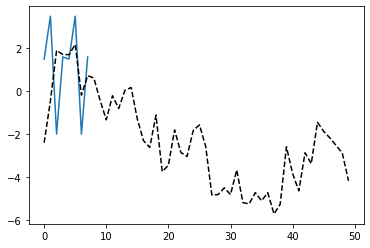

In [104]:
# 간단한 그래프 그리기
import numpy as np

plt.plot([1.5,3.5,-2,1.6,1.5,3.5,-2,1.6])
plt.plot(np.random.randn(50).cumsum(), 'k--')
plt.show()

한 화면에 두가지 그래프가 작성되었네요! 각각의 그래프를 떼어서 생각해 봅시다.

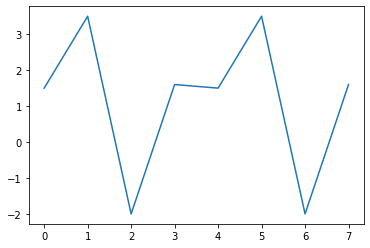

In [105]:
plt.plot([1.5,3.5,-2,1.6,1.5,3.5,-2,1.6])  # 선그래프 그리기
plt.show()  # 그래프 보여줘라!

위아래 모양새가 비슷하죠? x축 범위가 다르기 때문에 압축되었던 그래프가 펴졌네요.

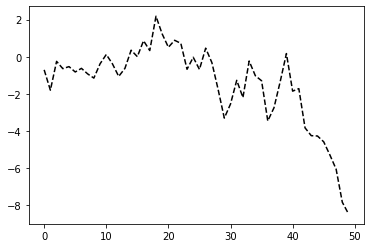

In [106]:
plt.plot(np.random.randn(50).cumsum(), 'k--')
plt.show()

어, 이건 왜 앞의 것을 그래로 붙였는데 앞과 그래프 분포가 다르죠? 넘파이를 배웠다면 random.randn() 때문이란 걸 아실 겁니다. 새로운 random이 시행되어서 달라진거죠. 

그런데 왜 검은 색 점선일까요? 옵션을 'k--'로 선택했기 때문에 그렇습니다. k는 black의 k이고, --는 점선을 의미합니다.


#### 여러 개의 그래프 한번에 그리기

이번에는 이 두 그래프를 다른 화면에 한번에 그려봅시다.

이때에는 figure를 생성해서 사용합니다. 하나의 큰 figure에 subplot(각각의 그래프)들이 들어갑니다. 쉽게 말해 figure는 그래프를 포함할 수 있는 윈도우(껍데기)이며, 그래프는 또 그 안에 별도로 생성해주어야 합니다.

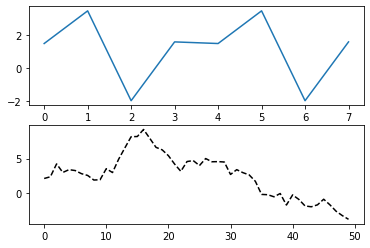

In [107]:
fig = plt.figure()   #figure 생성 

ax1 = fig.add_subplot(2,1,1)   #2*2 크기의 1번 서브플롯 
ax2 = fig.add_subplot(2,1,2)   #2*2 크기의 2번 서브플롯 


ax1.plot([1.5,3.5,-2,1.6,1.5,3.5,-2,1.6]) 
ax2.plot(np.random.randn(50).cumsum(), 'k--')


### 3.1. 1차원

|차트 이름| 정의 및 특징|
|---------|-------------|
|히스토그램|분포를 나타낼 때 사용한다.[위키백과](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8#:~:text=%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8(histogram)%EC%9D%80%20%ED%91%9C%EB%A1%9C%20%EB%90%98%EC%96%B4,%EB%95%8C%EB%95%8C%EB%A1%9C%20%EB%B0%98%EB%8C%80%EB%A1%9C%20%EA%B7%B8%EB%A6%AC%EA%B8%B0%EB%8F%84%20%ED%95%9C%EB%8B%A4.)에서는 "도수 분포를 그래프로 나타낸 것"으로 정의한다. 도수분포는 특정 값이 발생한 빈도, 횟수를 포함하며 이것을 단계로 구분지어 그림으로서 값의 분포를 요약한다.|
|pie chart|비율을 보여줄 때 사용한다. 도넛 차트 등 3차원으로 만드는 경우 시각적으로 왜곡이 생길 수 있으므로 조심해야 한다.|
|bar chart|수량을 보여주거나, 비교할 때 사용된다.|

- **히스토그램**

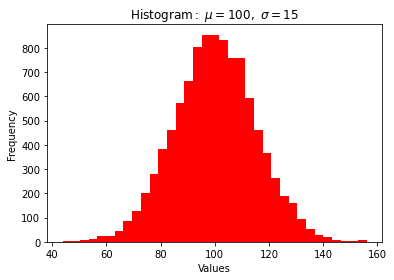

In [123]:
import numpy as np
import matplotlib.pyplot as plt

mu = 100
sigma = 15
x = np.random.normal(mu, sigma, 10000)

ax = plt.gca()

# the histogram of the data 
ax.hist(x, bins=35, color='r')  #히스토그램을 그리자
ax.set_xlabel('Values')       #x축을 values로 설정!
ax.set_ylabel('Frequency')    #y축을 Frequency로 설정!

# title을 이렇게 적어주세요~ 지금은 모르셔도 됩니다!
ax.set_title(r'$\mathrm{Histogram:}\ \mu=%d,\ \sigma=%d$' % (mu, sigma)) 

plt.show()

- **pie chart**

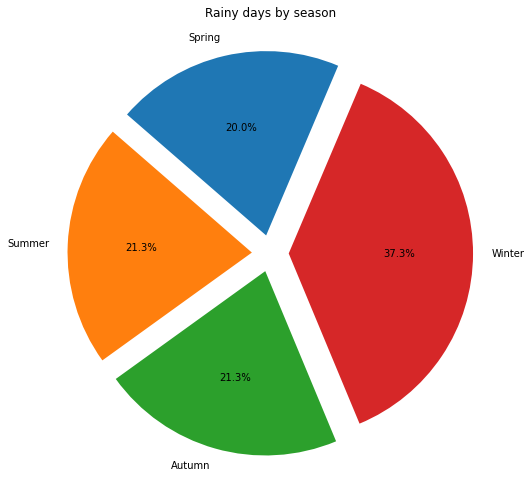

In [108]:
import matplotlib.pyplot as plt

# make a square figure and axes
# pie chart looks best in square figures 
# otherwise it looks like ellipses 
plt.figure(1, figsize=(8, 8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise. 
labels = 'Spring', 'Summer', 'Autumn', 'Winter'
values = [15, 16, 16, 28]
explode =[0.1, 0.1, 0.1, 0.1]

# make a pie
plt.pie(values, explode=explode, labels=labels,autopct='%1.1f%%', startangle=67)

plt.title('Rainy days by season')

plt.show()

- **bar chart**

In [122]:
plt.figure(figsize=(8, 6))

plt.bar(titanic_df.index, titanic_df.Survived, label='Female')
#plt.bar(titanic_df.index, titanic_df.survived['male'], label='male')

plt.title('Pclass별 남녀 생존률 비교')
plt.ylabel('survive_rate(%)')
plt.xlabel('Pclass')
plt.xticks(np.arange(1,4))
plt.legend()
plt.show()

KeyError: 'female'

<Figure size 576x432 with 0 Axes>

### 3.2. 2차원

- line plot: 제일 먼저 다룬 선 그래프입니다. 설명 생략할게요.
- scatter plot: 산점도 혹은 산포도. 데이터의 분포를 2차원 이상에서 알 수 있습니다.

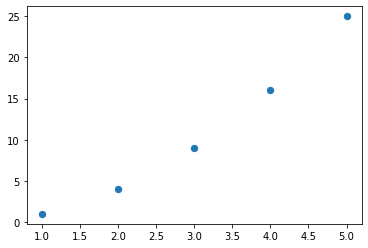

In [125]:
# 산점도

x_values = [1,2,3,4,5]
y_values = [1,4,9,16,25]

plt.scatter(x_values, y_values, s = 40)

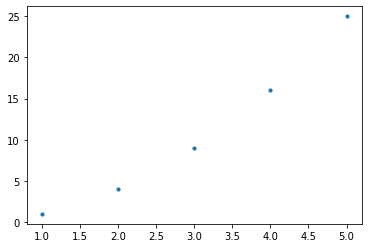

In [126]:
x_values = [1,2,3,4,5]
y_values = [1,4,9,16,25]

plt.scatter(x_values, y_values, s = 10)

### 3.3. 3차원(참고)

- bubble chart
- color map
- surface plot